In [1]:
import pandas as pd
import geopandas as gpd

from conversor import converter_latlong

In [5]:
#criando DF
df_postos = pd.read_excel("rawdata/exportação.xlsx")

#deduplicando o DF - retirando bicos e combustíveis
df_postos = df_postos.groupby(['CNPJ']).agg({'CNPJ':'first',
                                             'Razão Social':'first',
                                             'Vinculação a Distribuidor':'first',
                                             'Endereço':'first',
                                             'COMPLEMENTO':'first',
                                             'BAIRRO':'first',
                                             'CEP':'first',
                                             'UF':'first',
                                             'MUNICÍPIO':'first',
                                             'LATITUDE':'first',
                                             'LONGITUDE':'first'
})
df_postos = df_postos.reset_index(drop=True)

#formato original das lat longs
df_postos[["LATITUDE","LONGITUDE"]]

c:\Users\ciror\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,LATITUDE,LONGITUDE
0,"-15:49:18,588","-48:06:47,465"
1,"-22:20:40,647","-49:03:46,018"
2,"-22:20:01,485","-49:02:46,793"
3,"-23:30:07,770","-47:28:52,008"
4,"-23:29:06,888","-47:28:47,682"
...,...,...
44133,None,None
44134,"-29:37:10,960","-52:12:14,903"
44135,"-29:36:20,958","-52:11:46,219"
44136,None,None


In [6]:
#rodando a conversão
df_postos = converter_latlong(df_postos)

In [7]:
#novas lat longs
df_postos[["LATITUDE","LONGITUDE"]]

,LATITUDE,LONGITUDE
0,-15.821830,-48.113185
1,-22.344624,-49.062783
2,-22.333746,-49.046331
3,-23.502158,-47.481113
4,-23.485247,-47.479912
...,...,...
44133,NaN,NaN
44134,-29.619711,-52.204140
44135,-29.605822,-52.196172
44136,NaN,NaN


In [13]:
#preparando o geodataframe de plotagem de exemplo

gdf_postos_plot = gpd.GeoDataFrame(df_postos, geometry=gpd.points_from_xy(x=df_postos.LONGITUDE, y=df_postos.LATITUDE))
gdf_postos_plot = gdf_postos_plot.drop(columns=["LATITUDE","LONGITUDE"])

gdf_postos_plot[["geometry"]]

,geometry
0,POINT (-48.11318 -15.82183)
1,POINT (-49.06278 -22.34462)
2,POINT (-49.04633 -22.33375)
3,POINT (-47.48111 -23.50216)
4,POINT (-47.47991 -23.48525)
...,...
44133,POINT EMPTY
44134,POINT (-52.20414 -29.61971)
44135,POINT (-52.19617 -29.60582)
44136,POINT EMPTY


<Axes: >

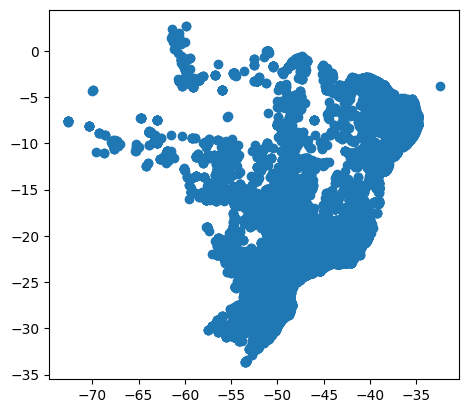

In [14]:
#plotagem
gdf_postos_plot.plot()